<a href="https://colab.research.google.com/github/AnjanaAbY/CBTCIP/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [65]:
# Load datasets
alcohol_sales = pd.read_csv('/content/Alcohol_Sales.csv')
print(alcohol_sales)

           DATE  S4248SM144NCEN
0    1992-01-01            3459
1    1992-02-01            3458
2    1992-03-01            4002
3    1992-04-01            4564
4    1992-05-01            4221
..          ...             ...
320  2018-09-01           12396
321  2018-10-01           13914
322  2018-11-01           14174
323  2018-12-01           15504
324  2019-01-01           10718

[325 rows x 2 columns]


In [66]:
alcohol_sales.rename(columns={'S4248SM144NCEN': 'sales'}, inplace=True)

In [67]:
print("Description:\n",alcohol_sales.describe())

Description:
               sales
count    325.000000
mean    7886.400000
std     2914.269061
min     3031.000000
25%     5231.000000
50%     7481.000000
75%     9977.000000
max    15504.000000


In [68]:
#checking null values
print("Null values:\n",alcohol_sales.isnull().sum())

Null values:
 DATE     0
sales    0
dtype: int64


In [69]:
# Convert date to datetime format
alcohol_sales['DATE'] = pd.to_datetime(alcohol_sales['DATE'])
alcohol_sales.set_index('DATE', inplace=True) # set date as index
alcohol_sales['rolling_sales'] = alcohol_sales['sales'].rolling(window=12).mean() #Calculate rolling average with a window of 12 months

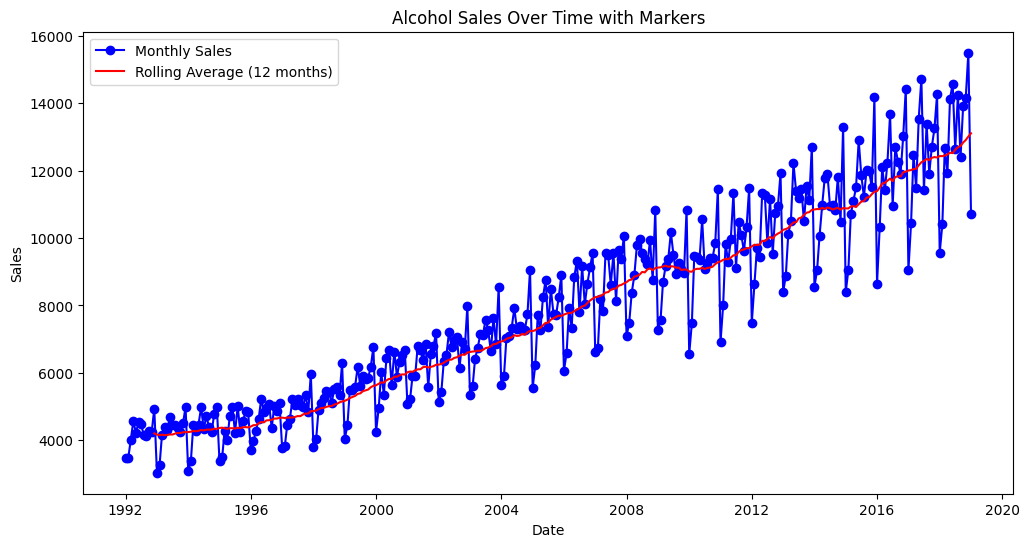

In [70]:
# Plotting the original sales data with markers
plt.figure(figsize=(12, 6))
plt.plot(alcohol_sales.index, alcohol_sales['sales'], marker='o', linestyle='-', color='blue', label='Monthly Sales')
plt.plot(alcohol_sales.index, alcohol_sales['rolling_sales'], color='red', label='Rolling Average (12 months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Alcohol Sales Over Time with Markers')
plt.legend()
plt.show()

In [73]:
# Split data into train and test
train_size = int(len(alcohol_sales) * 0.8)
train, test = alcohol_sales.iloc[:train_size], alcohol_sales.iloc[train_size:]

In [74]:
# Define and Fit ARIMA model
arima_order = (5, 1, 0)
model = ARIMA(train['sales'], order=arima_order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

In [77]:
# Evaluate the forecast
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)
print(f"ARIMA Model RMSE: {rmse}")
print(f"ARIMA Model MAE: {mae}")

ARIMA Model RMSE: 1754.4605642358906
ARIMA Model MAE: 1397.6341359041348


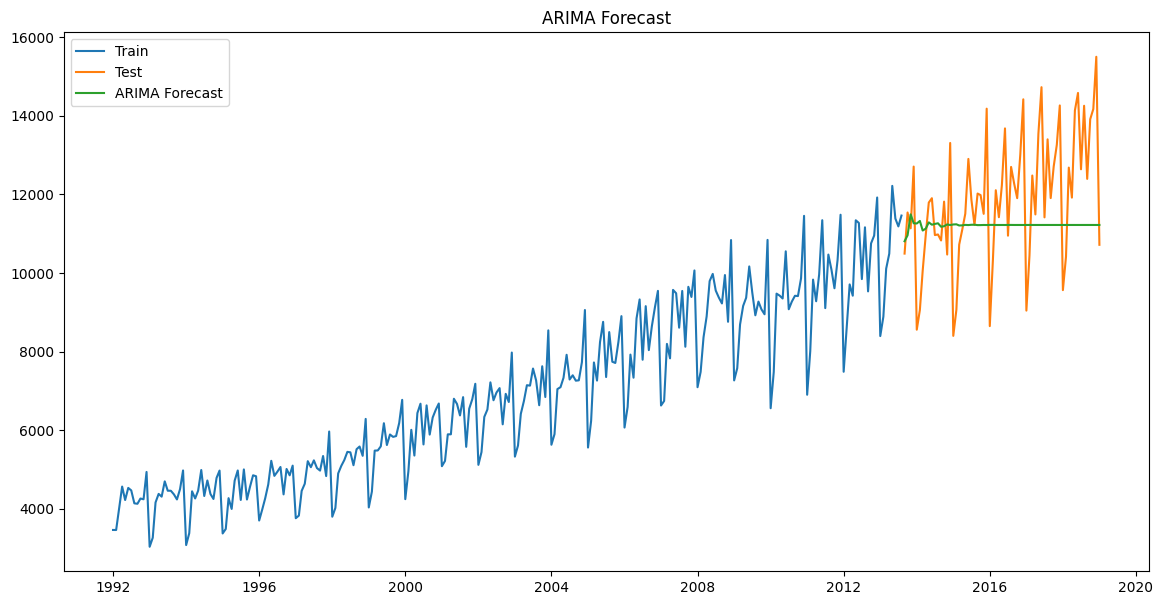

In [78]:
# Plot forecasts
plt.figure(figsize=(14, 7))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()